# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


**note** เปลี่บยจาก y จาก vector เป็น 2D array เนื่องจาก StandardScaler รับ input แค่ 2D array (numpy array)

In [5]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

**Note** เนื่องจากใน SVR ไม่มีสมหารชัดเจและทำให้ไม่มี coefficient ในการช่วยลดตัวแปรอิสระที่มีเลขเยอะ ดังนั้นต้องใช้ Feature Scaling 

การใช้ Feature Scaling มักจะใช้กับสมการที่เป็น implicit function (ฟังก์ชันโดยปริยาย) ซึ่งหมายถึง  ฟังก์ชันที่ไม่สามารถเขียน y ได้แบบเดียว (เขียนได้หลายแบบ) เช่น $y^2=x$ จะเห็นว่า $y=x$ หรือ $y=-x$ ก็ได้, $x^2+y^2=25$ ซึ่งสมการนี้เป็นสมการวงกลม โดยที่ $y=\sqrt{25-x^2}$ หรือ $y=-\sqrt{25-x^2}$ ก็ได้


In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

<img src='https://data-flair.training/blogs/wp-content/uploads/sites/2/2017/08/svm-kernel-functions-2.jpg' width='800' height='400'>

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
regressor.fit(X,y)

C:\Users\dream\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [13]:
sc_y.inverse_transform([regressor.predict(sc_X.transform([[6.5]]))])

array([[170370.0204065]])

### **Important** เนื่องจากในตอนนี้ inverse_transform นั้นต้องการรับค่าเป็น 2D array

In [42]:
regressor.predict(X)

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

**Solution 1**

In [87]:
regressor.predict(X).reshape(len(regressor.predict(X)),1)

array([[-0.6197853 ],
       [-0.62924694],
       [-0.56788994],
       [-0.49732233],
       [-0.44690338],
       [-0.36617206],
       [-0.14115569],
       [ 0.28557658],
       [ 0.78226531],
       [ 1.08559794]])

In [88]:
sc_y.inverse_transform(regressor.predict(X).reshape(len(regressor.predict(X)),1))

array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

**Solution 2**

In [43]:
y_pred = regressor.predict(X)

In [48]:
y_pred = y_pred.reshape(len(y_pred),1)

In [49]:
print(y_pred)

[[-0.6197853 ]
 [-0.62924694]
 [-0.56788994]
 [-0.49732233]
 [-0.44690338]
 [-0.36617206]
 [-0.14115569]
 [ 0.28557658]
 [ 0.78226531]
 [ 1.08559794]]


In [76]:
sc_y.inverse_transform(y_pred)


array([[ 73474.15615697],
       [ 70786.94584626],
       [ 88213.00902103],
       [108254.98574956],
       [122574.52250599],
       [145503.10688572],
       [209410.23132923],
       [330606.89204569],
       [471671.95587315],
       [557821.75899897]])

**2D > 1D**

In [77]:
tt = sc_y.inverse_transform(y_pred)

In [80]:
tt = tt.flatten()
tt

array([ 73474.15615697,  70786.94584626,  88213.00902103, 108254.98574956,
       122574.52250599, 145503.10688572, 209410.23132923, 330606.89204569,
       471671.95587315, 557821.75899897])

## Visualising the SVR results

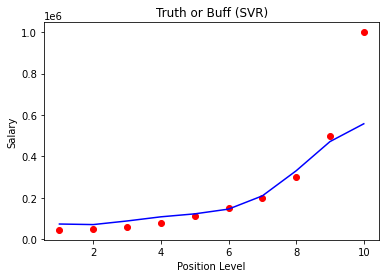

In [89]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(len(regressor.predict(X)),1)), color = 'blue')
plt.title('Truth or Buff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

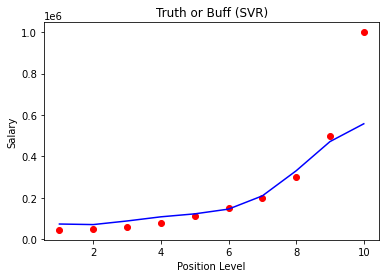

In [81]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), tt, color = 'blue')
plt.title('Truth or Buff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

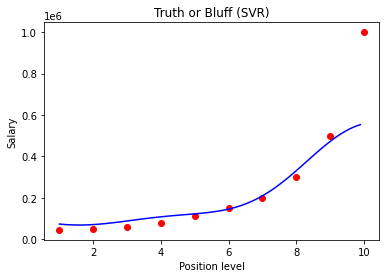

In [91]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(len(regressor.predict(sc_X.transform(X_grid))),1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()